<a href="https://colab.research.google.com/github/gurung-ajay/Sentiment-Analysis-on-IMDB-reviews-with-Machine-Learning/blob/main/Sentiment_analysis_on_IMDB_reviews_with_Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis on IMDB reviews with Machine Learning Models

Using: Scikit learn, NLTK, Pandas and Matplotlib

In this project I am trying to build a Machine Learning model that trains on data about IMDB reviews which are classified as positive or negative. After training, it will be able to predict if a reivew is positive or negative on new data.

Data consists of two columns:
* First column has IMDB reviews
* Second column has Sentiment

Here I have experimented on four ML models: MultinominalNB, Logistic Regression, KNN and Random Forest, to compare their performance, and find the best one.

In [ ]:
!gdown https://drive.google.com/uc?id=1_JycQl_WP8jBlU24k9USI4MstAooXovq&export=download # train dataset

Downloading...
From: https://drive.google.com/uc?id=1_JycQl_WP8jBlU24k9USI4MstAooXovq
To: /content/imdb_reviews.csv
100% 31.7M/31.7M [00:00<00:00, 42.1MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0&export=download # test dataset

Downloading...
From: https://drive.google.com/uc?id=1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0
To: /content/test_reviews.csv
100% 30.5M/30.5M [00:00<00:00, 50.5MB/s]


# Importing libraries

In [ ]:
import pandas as pd
import nltk
import pickle
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv('/content/imdb_reviews.csv')
df_test = pd.read_csv('/content/test_reviews.csv')

In [ ]:
df_train.sample(2)

,Reviews,Sentiment
23168,<START this is the last of four <UNK> from fra...,positive
16046,<START so has it really come to this are we as...,negative


In [ ]:
df_test.sample(2)

,Reviews,Sentiment
12184,<START this is the best work i have ever seen ...,positive
11018,<START destined to be a classic before it was ...,positive


# Preprocessing Data

In [ ]:
df_train.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

* Tokenization
* Stop words removal
* Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_data(x):
  # lowercasing
  x = x.lower()
  # tokenization
  words = nltk.word_tokenize(x)
  # stop words removal
  stop_words = list(nltk.corpus.stopwords.words('english'))
  clean_words = [item for item in words if item not in stop_words]
  # lemmatization
  lemmatized_words = [lemmatizer.lemmatize(w) for w in clean_words]
  return ' '.join(lemmatized_words)

In [ ]:
df_train['Reviews'] = df_train['Reviews'].apply(clean_data)
df_test['Reviews'] = df_test['Reviews'].apply(clean_data)

# Vectorization

Vectorizing the preprocessed data

In [ ]:
X_train = df_train['Reviews']
X_test = df_test['Reviews']

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
y_train = df_train['Sentiment']
y_test = df_test['Sentiment']

# Naive Bayes Model (Multinominal NB)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = model.predict(X_test_vectorized)

## Evaluation of Multinominal NB

In [ ]:
nb_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_nb)
nb_precision = precision_score(y_true = y_test, y_pred = y_pred_nb, pos_label='positive')
nb_recall = recall_score(y_true = y_test, y_pred = y_pred_nb, pos_label='positive')
nb_f1 = f1_score(y_true = y_test, y_pred = y_pred_nb, pos_label='positive')
print(f'Accuracy = {nb_accuracy}\nPrecision = {nb_precision}\nRecall = {nb_recall}\nF1 = {nb_f1}')

Accuracy = 0.83208
Precision = 0.8604550191038555
Recall = 0.79272
F1 = 0.8251998667554964


In [ ]:
nb_report = classification_report(y_true = y_test, y_pred = y_pred_nb)
print(nb_report)

              precision    recall  f1-score   support

    negative       0.81      0.87      0.84     12500
    positive       0.86      0.79      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_nb)

array([[10893,  1607],
       [ 2591,  9909]])

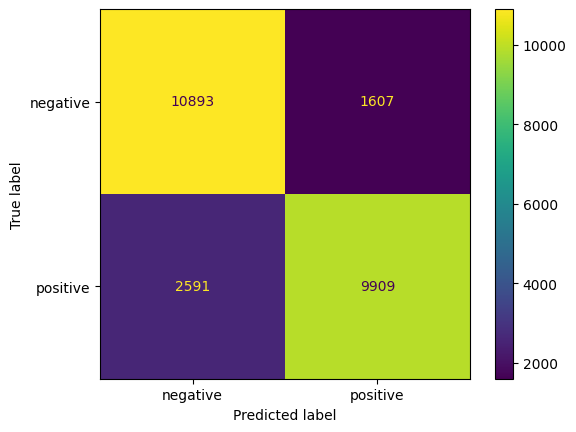

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test_vectorized, y_test)

In [ ]:
h = 'I loved the film even though the ending was disappointing. The cinematics were simply amazing.'
h_vectorized = vectorizer.transform([h])
model.predict(h_vectorized)

array(['positive'], dtype='<U8')

In [ ]:
h = 'Worst movie of all time'
h_vectorized = vectorizer.transform([h])
model.predict(h_vectorized)

array(['negative'], dtype='<U8')

# Logistic Regression Model

In [ ]:
log_model = LogisticRegression(max_iter=5000)

In [ ]:
log_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred_log = log_model.predict(X_test_vectorized)

## Evaluation of Logistic Regression

In [ ]:
log_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_log)
log_precision = precision_score(y_true = y_test, y_pred = y_pred_log, pos_label='positive')
log_recall = recall_score(y_true = y_test, y_pred = y_pred_log, pos_label='positive')
log_f1 = f1_score(y_true = y_test, y_pred = y_pred_log, pos_label='positive')
print(f'Accuracy = {log_accuracy}\nPrecision = {log_precision}\nRecall = {log_recall}\nF1 = {log_f1}')

Accuracy = 0.8498
Precision = 0.855863921217547
Recall = 0.84128
F1 = 0.8485092992294347


In [ ]:
log_report = classification_report(y_true = y_test, y_pred = y_pred_log)
print(log_report)

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85     12500
    positive       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_log)

array([[10729,  1771],
       [ 1984, 10516]])

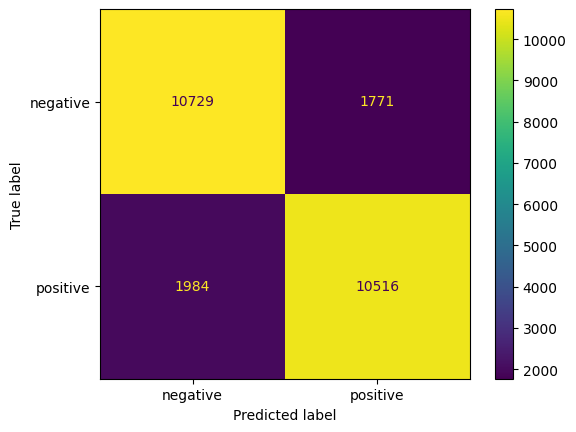

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_vectorized, y_test)

In [ ]:
h = 'I loved the film even though the ending was disappointing. The cinematics were simply amazing.'
h_vectorized = vectorizer.transform([h])
log_model.predict(h_vectorized)

array(['positive'], dtype=object)

In [ ]:
h = 'Worst movie of all time'
h_vectorized = vectorizer.transform([h])
log_model.predict(h_vectorized)

array(['negative'], dtype=object)

# KNN Classifier Model

In [ ]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train_vectorized, y_train)
y_pred_knn = knn_model.predict(X_test_vectorized)

## Evaluation

In [ ]:
knn_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_knn)
knn_precision = precision_score(y_true = y_test, y_pred = y_pred_knn, pos_label='positive')
knn_recall = recall_score(y_true = y_test, y_pred = y_pred_knn, pos_label='positive')
knn_f1 = f1_score(y_true = y_test, y_pred = y_pred_knn, pos_label='positive')
print(f'Accuracy = {knn_accuracy}\nPrecision = {knn_precision}\nRecall = {knn_recall}\nF1 = {knn_f1}')

Accuracy = 0.587
Precision = 0.5843088611520273
Recall = 0.60296
F1 = 0.5934879325957715


In [ ]:
knn_report = classification_report(y_true = y_test, y_pred = y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

    negative       0.59      0.57      0.58     12500
    positive       0.58      0.60      0.59     12500

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_knn)

array([[7138, 5362],
       [4963, 7537]])

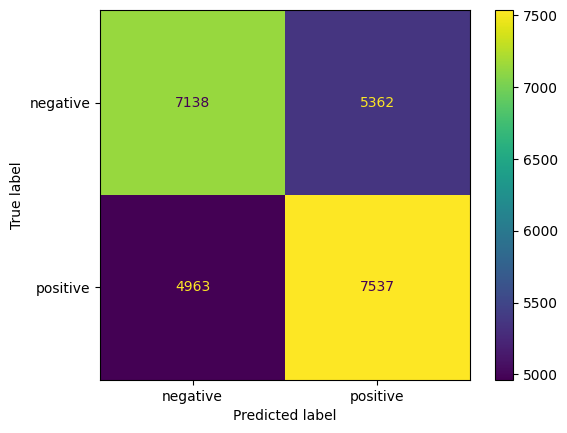

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_vectorized, y_test)

# Random Forest Classifier Model

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_test_vectorized, y_train)
y_pred_rf = rf_model.predict(X_test_vectorized)

In [ ]:
rf_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_rf)
rf_precision = precision_score(y_true = y_test, y_pred = y_pred_rf, pos_label='positive')
rf_recall = recall_score(y_true = y_test, y_pred = y_pred_rf, pos_label='positive')
rf_f1 = f1_score(y_true = y_test, y_pred = y_pred_rf, pos_label='positive')
print(f'Accuracy = {rf_accuracy}\nPrecision = {rf_precision}\nRecall = {rf_recall}\nF1 = {rf_f1}')

Accuracy = 0.49668
Precision = 0.4966813274690124
Recall = 0.49688
F1 = 0.4967806438712257


In [ ]:
rf_report = classification_report(y_true = y_test, y_pred = y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

    negative       0.50      0.50      0.50     12500
    positive       0.50      0.50      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_rf)

array([[6206, 6294],
       [6289, 6211]])

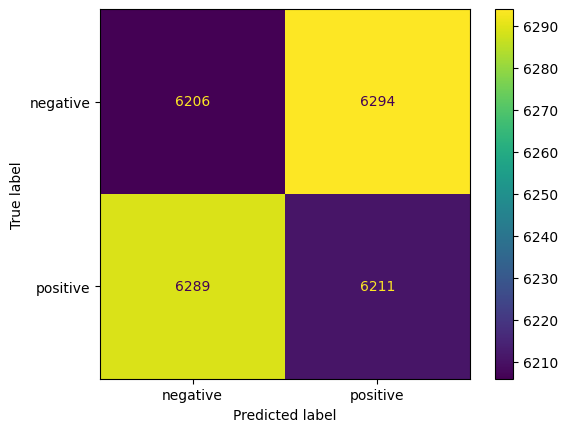

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_vectorized, y_test)

# Comparing the models

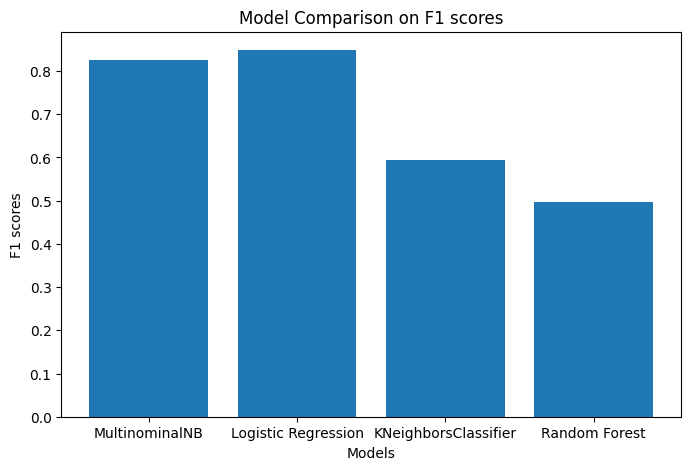

In [ ]:
plt.figure(figsize = (8,5))
plt.title('Model Comparison on F1 scores')
f1_scores = [nb_f1, log_f1, knn_f1, rf_f1]
x = ['MultinominalNB', 'Logistic Regression', 'KNeighborsClassifier', 'Random Forest']
plt.xlabel('Models')
plt.ylabel('F1 scores')
plt.bar(x, f1_scores)
plt.show()

From this plot we can see that the Logistic Regression Model performs best when using f1 score as a basis for comparison.

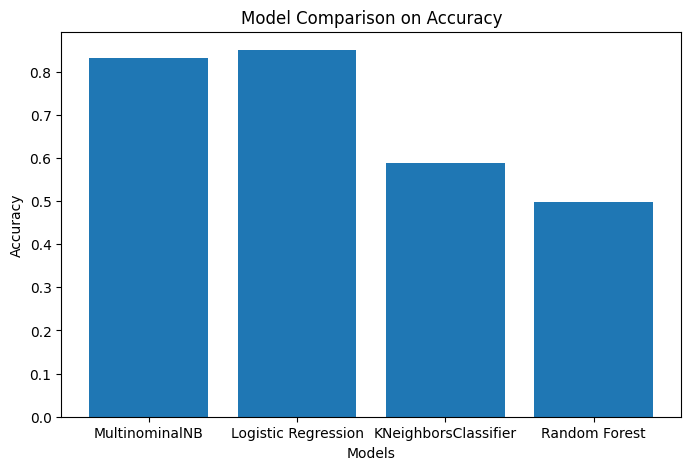

In [ ]:
plt.figure(figsize = (8,5))
accuracy_scores = [nb_accuracy, log_accuracy, knn_accuracy, rf_accuracy]
x = ['MultinominalNB', 'Logistic Regression', 'KNeighborsClassifier', 'Random Forest']
plt.title('Model Comparison on Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.bar(x, accuracy_scores)
plt.show()

From this plot we can see that the Logistic Regression Model performs best again, when using accuracy score as a basis for comparison.

Checking how much accuracy does the highest performing model, Logistic Regression, get with cross validation.

In [ ]:
cv_score = cross_val_score(log_model, X_train_vectorized, y_train, cv=5)
print(f'Cross validation score = {cv_score.mean()}')

Cross validation score = 0.8674


# Conclusion

While comparing these four models (MultonimalNB, Logistic Regression, KNeighborsClassifier and Random Forest), the model which scored highest with f1 score and accuracy is Logistic Regression. It is the best model to use for classification of IMDB reviews on this dataset.

# Saving Model

Saving vectorizer with Logistic Regression model in a pipeline model.

In [ ]:
pipe = make_pipeline(vectorizer, log_model)

In [ ]:
with open('LogisticRegressionIMDBClassifier.pickle', 'wb') as file:
  pickle.dump(pipe, file)